In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)


def generate_sample(x_min=-3., x_max=3., sample_size=10):
    x = np.linspace(x_min, x_max, num=sample_size)
    y = x + np.random.normal(loc=0., scale=.2, size=sample_size)
    y[-1] = y[-2] = y[1] = -4  # outliers
    return x, y

x, y = generate_sample()

In [2]:
def f(x, theta):
    return theta[0]+ theta[1]*x
def rho(r):
    if abs(r) < e:
        return (1 - (1-r**2/e**2)**3)/6
    else:
        return 1/6

In [3]:
theta = np.array([0.5, -0.5])
Phi = np.array([[1, x[i]] for i in range(len(x))])
e = 0.2
for i in range(100): #  更新部分
    W = np.diag([ 1 if abs(f(x[i], theta)-y[i])<=e else e/abs(f(x[i], theta)-y[i]) for i in range(len(x)) ])
    theta = np.linalg.inv(Phi.T@W@Phi)@Phi.T@W@y

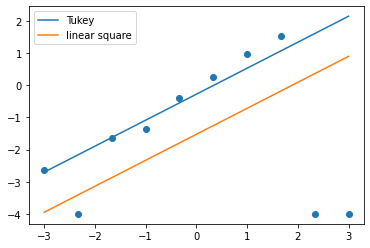

In [4]:
plt.scatter(x, y)
X = np.linspace(min(x), max(x))
Y = theta[0] + theta[1]*X
plt.plot(X, Y, label="Tukey")
theta2 = np.linalg.inv(Phi.T@Phi)@Phi.T@y
Y2 = theta2[0] + theta[1]*X
plt.plot(X, Y2, label="linear square")
plt.legend()

# 外れ値の影響を受けていない